Dataset dimensions: (7043, 21)

Data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

First few rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Unique values per column:
customerID: 7043
gender: 2
SeniorCitizen: 2
Partner: 2
Dependents: 2
tenure: 73
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
MonthlyCharges: 1585
TotalCharges: 6531
Churn: 2

Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Empty string values per column:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents  

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



Summary statistics for categorical features:


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


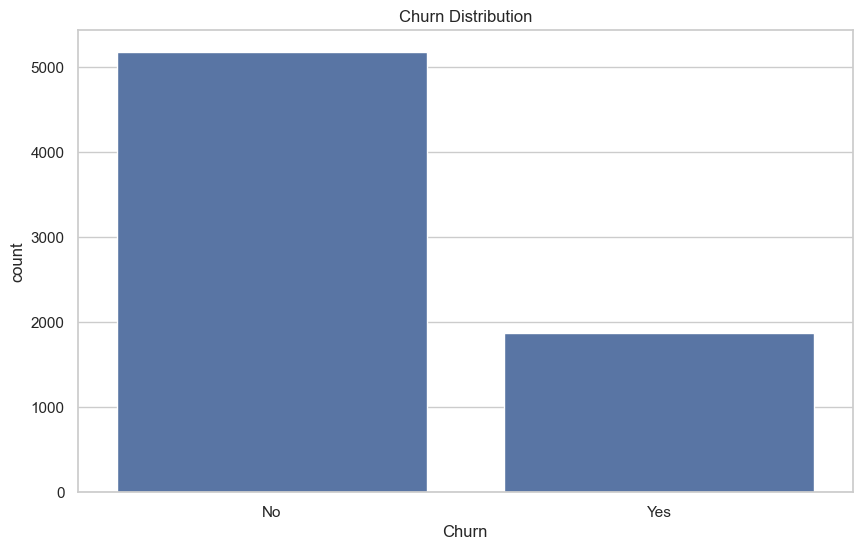

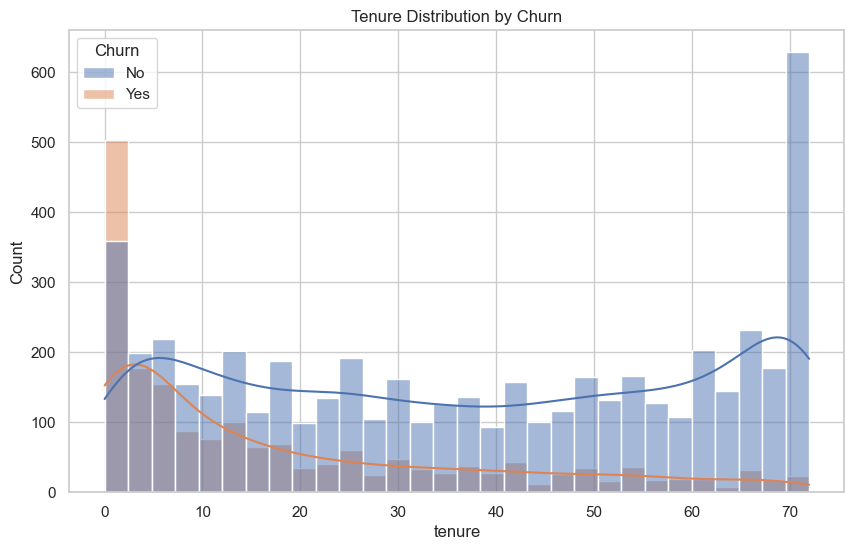

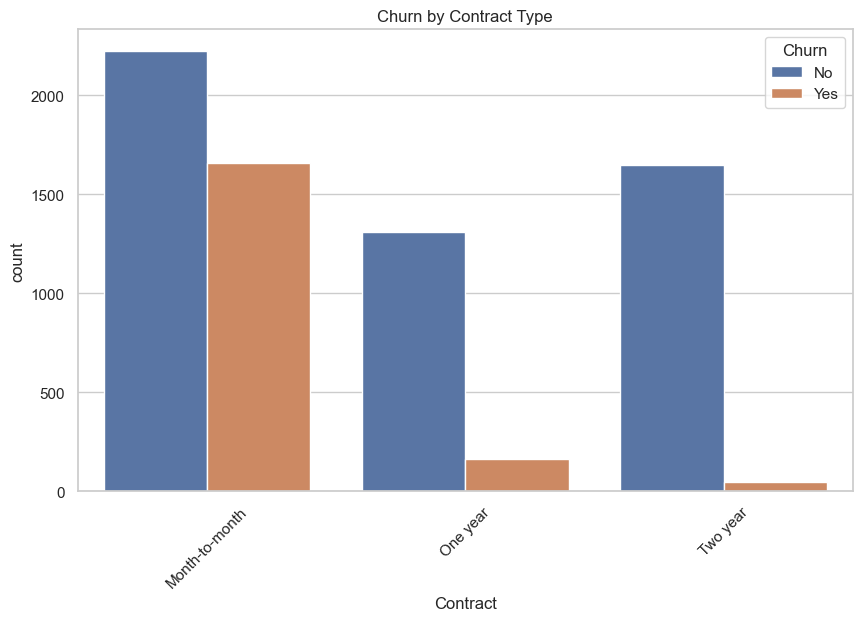

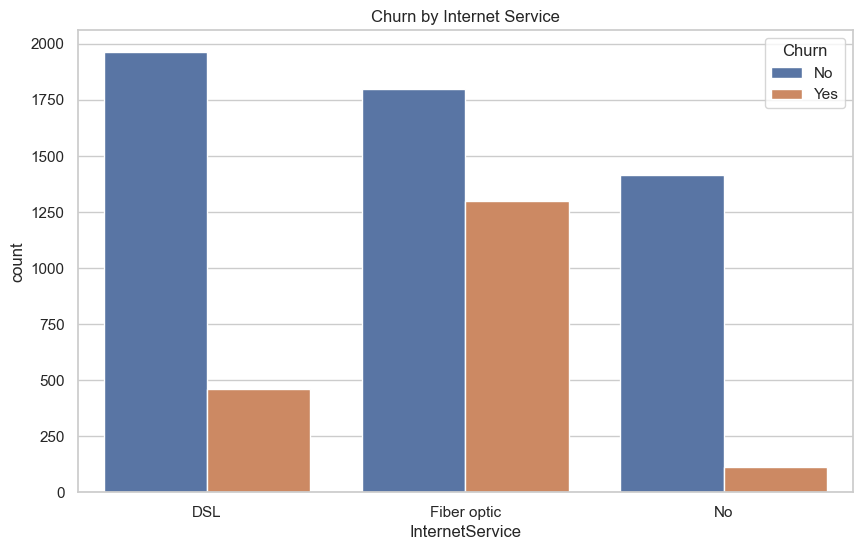

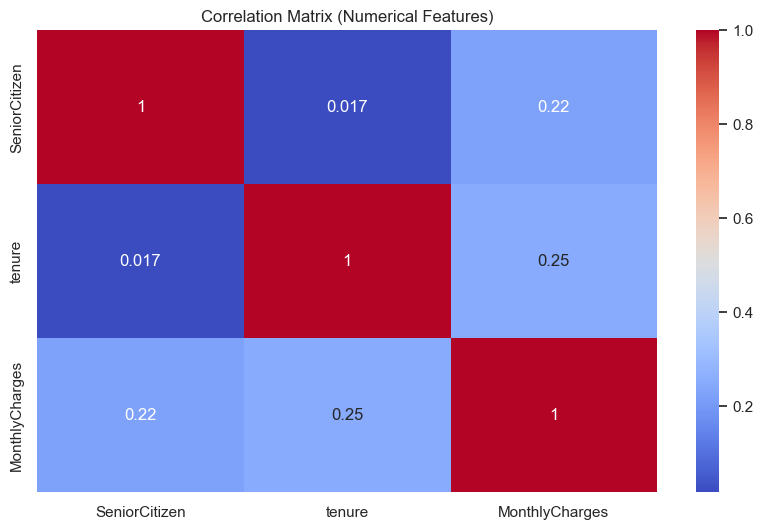

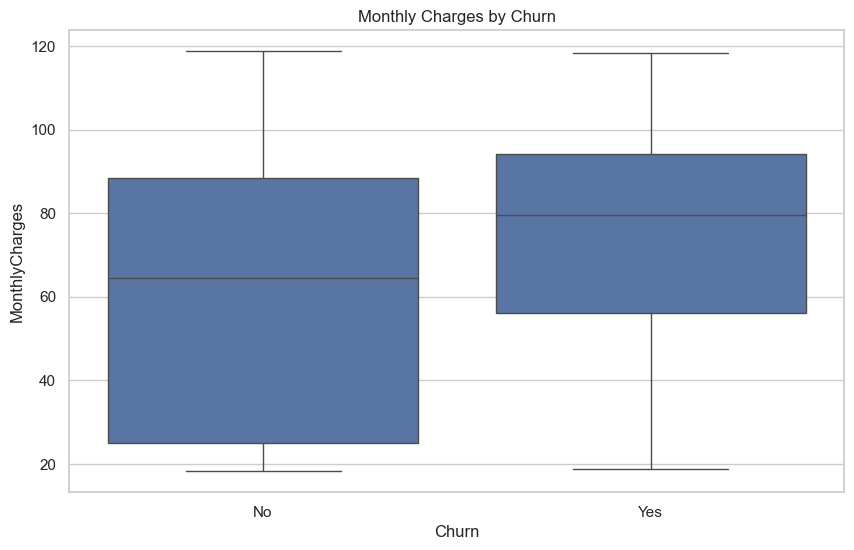

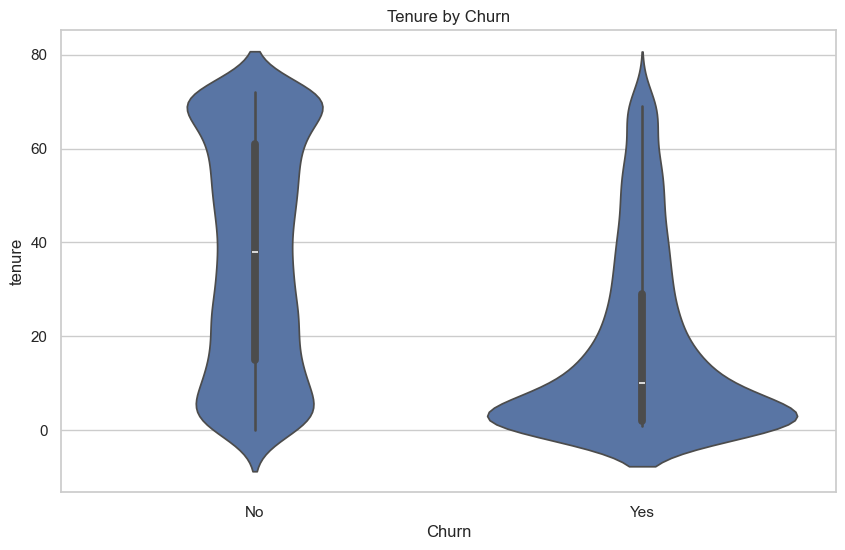

In [1]:
# 🔍 Exploratory Data Analysis (EDA) - Telco Customer Churn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set global aesthetics for seaborn and matplotlib
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load dataset
df = pd.read_csv('../src/data/telco_churn.csv')

# Basic overview
print("Dataset dimensions:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nFirst few rows:")
display(df.head())

# Unique values per column
print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

# Missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

# Check for empty strings (common data quality issue)
print("\nEmpty string values per column:")
print((df == ' ').sum())

# Summary statistics for numerical variables
print("\nSummary statistics for numerical features:")
display(df.describe())

# Summary statistics for categorical variables
print("\nSummary statistics for categorical features:")
display(df.describe(include='object'))

# Key Visualizations

# 1. Churn distribution
plt.figure()
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# 2. Tenure distribution by churn status
plt.figure()
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title('Tenure Distribution by Churn')
plt.show()

# 3. Churn by contract type
plt.figure()
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.xticks(rotation=45)
plt.show()

# 4. Churn by internet service type
plt.figure()
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn by Internet Service')
plt.show()

# 5. Correlation matrix for numerical variables
plt.figure()
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

# 6. Boxplot of MonthlyCharges vs. Churn
plt.figure()
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn')
plt.show()

# 7. Violinplot of tenure vs. Churn
plt.figure()
sns.violinplot(data=df, x='Churn', y='tenure')
plt.title('Tenure by Churn')
plt.show()